<a href="https://colab.research.google.com/github/AdityaA2/SVHNDeepLearning/blob/main/High_Code_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical



**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.19.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [5]:
#Check num images
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
42,000 pieces of data was retrieved for the training dataset and 18000 were retrieved for the test.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

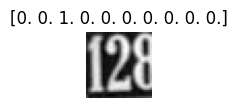

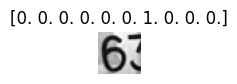

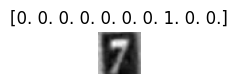

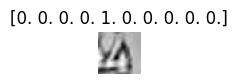

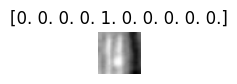

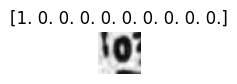

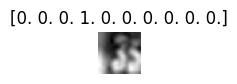

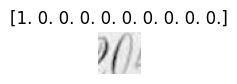

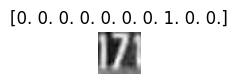

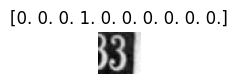

In [34]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(1,10,i+1)

  plt.imshow(X_train[i], cmap = 'gray')

  plt.title(y_train[i])
  plt.axis('off')
  plt.show()


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [7]:
X_train.shape
print(X_train[0])

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [8]:
X_train = X_train/255
X_test = X_test/255



Print the shapes of Training and Test data

In [9]:
print(f'Train dataset shape {X_train.shape}')
print(f'Test dataset shape {X_test.shape}')

Train dataset shape (42000, 32, 32)
Test dataset shape (18000, 32, 32)


### **One-hot encode output**

In [10]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f'New shape of y_train: {y_train.shape}')
print(f'New shape of y_test: {y_test.shape}')

New shape of y_train: (42000, 10)
New shape of y_test: (18000, 10)


**Observation:**
The size of the datasets are the same as before, but they're now conforming to 4 dimensions.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [11]:
from tensorflow.keras import backend #For Clearing backend
backend.clear_session()

np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [12]:
def nn_model_1():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(1024,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Flatten the input images for the ANN model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

new_model = nn_model_1()
print(new_model.summary())
history = new_model.fit(X_train_flat, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1088 - loss: 2.3082 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2135 - loss: 2.1556 - val_accuracy: 0.3065 - val_loss: 1.9384
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3158 - loss: 1.9163 - val_accuracy: 0.3844 - val_loss: 1.7683
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4275 - loss: 1.6879 - val_accuracy: 0.5104 - val_loss: 1.4989
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5228 - loss: 1.4552 - val_accuracy: 0.5558 - val_loss: 1.3696
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5636 - loss: 1.3518 - val_accuracy: 0.5798 - val_loss: 1.3064
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5877 - loss: 1.2884 - val_accuracy: 0.6018 - val_loss: 1.2553
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6060 - loss: 1.2421 - val_accurac

### **Plot the Training and Validation Accuracies and write down your Observations.**

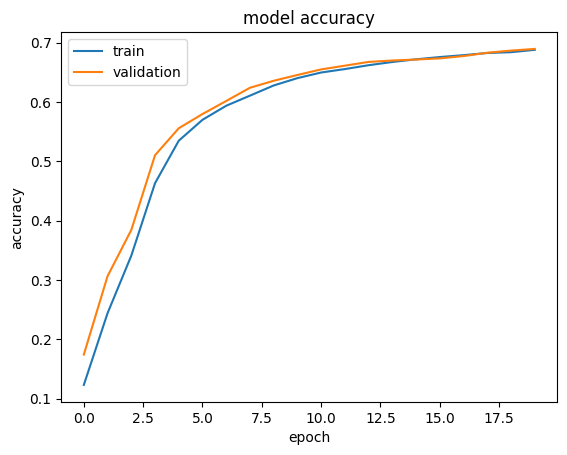

In [13]:
#Plotting training and validation accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

* The validation accuracy is actually ahead of the training in this run, being a change from how it was before.
* They both steadiily increase until rounding out near the 10th epoch.
* This could show to be an overfitting of the validation dataset and the training.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [14]:
backend.clear_session()

np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [15]:
def nn_model_2():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(1024,))) #First layer
    model.add(Dense(128, activation='relu'))  #Secondlayer
    model.add(Dropout(0.2))                   #Dropout layer
    model.add(Dense(64, activation='relu'))   #Third layer
    model.add(Dense(64, activation='relu'))   #Fourth Layer
    model.add(Dense(32, activation='relu'))   #Fifth
    model.add(BatchNormalization())           #Batch Normalization
    model.add(Dense(10, activation='softmax'))#Output layer
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Flatten the input images for the ANN model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

new_model2 = nn_model_2()
print(new_model2.summary())
history = new_model2.fit(X_train_flat, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

None
Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6906 - loss: 1.0058 - val_accuracy: 0.6932 - val_loss: 1.0152
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6942 - loss: 0.9972 - val_accuracy: 0.6964 - val_loss: 1.0092
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6969 - loss: 0.9894 - val_accuracy: 0.6977 - val_loss: 1.0057
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7008 - loss: 0.9815 - val_accuracy: 0.7006 - val_loss: 1.0033
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7040 - loss: 0.9731 - val_accuracy: 0.7033 - val_loss: 0.9962
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7065 - loss: 0.9673 - val_accuracy: 0.7055 - val_loss: 0.9886
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7100 - loss: 0.9602 - val_accuracy: 0.7079 - val_loss: 0.9837
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7111 - loss: 0.9530 - val_accura

### **Plot the Training and Validation Accuracies and write down your Observations.**

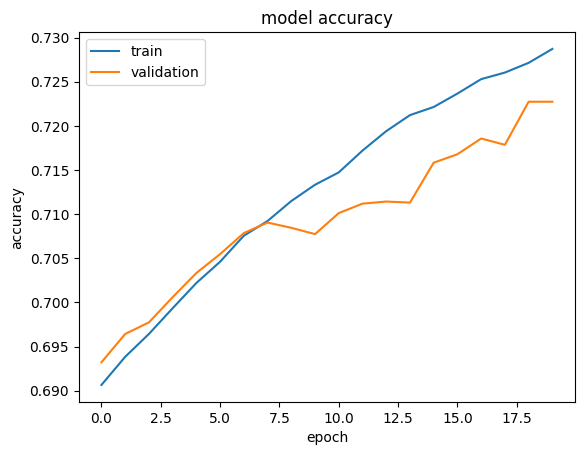

In [16]:
#Plotting training and validation accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

We witness that the model's accuracy is continuously improving for both the training and the validation sets, the main difference is the validation set is about 50% behind in terms of improvement through each epoch. However the overall improvement throughout the 20 epochs is extremely minimal.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1814
           1       0.70      0.77      0.73      1828
           2       0.76      0.75      0.76      1803
           3       0.70      0.66      0.68      1719
           4       0.75      0.77      0.76      1812
           5       0.63      0.68      0.65      1768
           6       0.70      0.71      0.71      1832
           7       0.77      0.76      0.77      1808
           8       0.67      0.67      0.67      1812
           9       0.72      0.69      0.71      1804

    accuracy                           0.72     18000
   macro avg       0.72      0.72      0.72     18000
weighted avg       0.72      0.72      0.72     18000



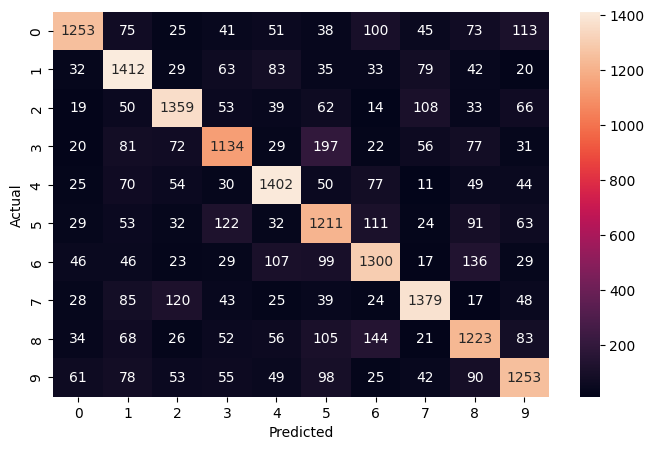

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = new_model2.predict(X_test_flat) # Corrected to use new_model and X_test_flat
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1) # Corrected to use y_test

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = [0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

**Final Observations:**


*   The model is around 70% accurate on test data
*   There have been numerous miscalculations between all digits
* The lowest accuracy is with the 8's and 5's being very close with each other, at 60 and 61% respectively.
* 8 is most commonly confused with 5,6 and 9 and 5 with 8,6, and 3
* The highest prediction rate is 9




## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [18]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [19]:
print(len(X_train))
print(len(X_test))

42000
18000


**Observation:**
Same amount of images as previously were retrieved.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [20]:
#Printing shape and array of pixels
X_train.shape
print(X_train[0])




[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [21]:
#Reshaping

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [22]:
#Normalizing
X_train = X_train/255
X_test = X_test/255

Print New shape of Training and Test

In [23]:
#Printing new shapes of train and test
print(f'New shape of X_train: {X_train.shape}')
print(f'New shape of X_test: {X_test.shape}')

New shape of X_train: (42000, 32, 32, 1)
New shape of X_test: (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [24]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


**Observation:**
The shape of the test data did not change, this could be a result of the reshaping, however it fits the four dimensional input.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [25]:
backend.clear_session()

np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [29]:
#Importing necessary libraries

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LeakyReLU

def cnn_model_1():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', input_shape=(32, 32, 1)))#First layer
    model.add(LeakyReLU(alpha = 0.1))  #LeakyReLU after first Conv2D
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same')) #Second Conv2D layer with 32 filters
    model.add(LeakyReLU(alpha = 0.1))    #LeakyReLU after second Conv2D
    model.add(MaxPooling2D(pool_size = (2,2)))   #Max-pooling layer
    model.add(Flatten())                   #Flatten layer
    model.add(Dense(32))                   #Dense layer with 32 nodes (no activation yet)
    model.add(LeakyReLU(alpha = 0.1))      #LeakyReLU after Dense
    model.add(Dense(10, activation='softmax'))#Output layer
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Create and train the model
new_model_cnn_1 = cnn_model_1()
print(new_model_cnn_1.summary())
history_cnn_1 = new_model_cnn_1.fit(X_train, y_train, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 90s 82ms/step - accuracy: 0.3704 - loss: 1.7410 - val_accuracy: 0.8121 - val_loss: 0.6475
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 73s 69ms/step - accuracy: 0.8336 - loss: 0.5723 - val_accuracy: 0.8417 - val_loss: 0.5529
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 74s 70ms/step - accuracy: 0.8668 - loss: 0.4608 - val_accuracy: 0.8615 - val_loss: 0.5061
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 73s 70ms/step - accuracy: 0.8844 - loss: 0.3962 - val_accuracy: 0.8642 - val_loss: 0.4994
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.8989 - loss: 0.3469 - val_accuracy: 0.8704 - val_loss: 0.4931
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 73s 69ms/step - accuracy: 0.9108 - loss: 0.3059 - val_accuracy: 0.8693 - val_loss: 0.5087
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 77s 73ms/step - accuracy: 0.9210 - loss: 0.2702 - val_accuracy: 0.8660 - val_loss: 0.5333
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 74s 70ms/step - accuracy: 0.9

### **Plot the Training and Validation Accuracies and Write your observations.**

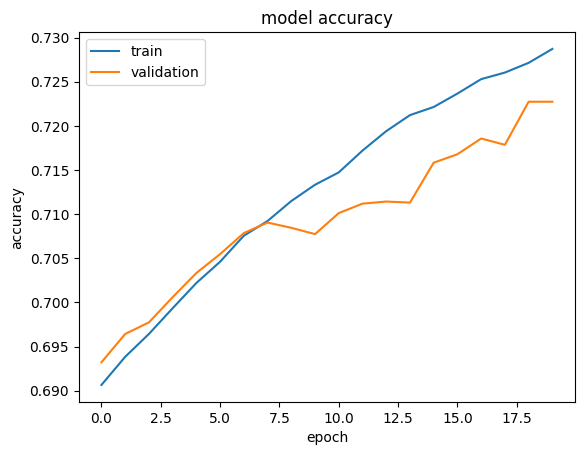

In [30]:
#Plotting training and validation accuracies
plt.plot(history_cnn_1.history['accuracy'])
plt.plot(history_cnn_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**


*   The validation accuracy was closely following with the training accuracy however quickly slows down suddenly around the 7.5 epoch
*   The validation accuracy started slowing down around the 7.5 epoch with sudden increases starting around the 10th.
* The training accuracy steadily improves throughout



Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [31]:
backend.clear_session()

np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [33]:
def cnn_model_2():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Create and train the model
new_model_cnn_2 = cnn_model_2()
print(new_model_cnn_2.summary())
history_cnn_2 = new_model_cnn_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

None
Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 126s 465ms/step - accuracy: 0.3115 - loss: 2.0100 - val_accuracy: 0.4032 - val_loss: 1.6281
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 121s 459ms/step - accuracy: 0.7779 - loss: 0.7147 - val_accuracy: 0.8343 - val_loss: 0.5419
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 143s 465ms/step - accuracy: 0.8272 - loss: 0.5716 - val_accuracy: 0.8640 - val_loss: 0.4463
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 146s 483ms/step - accuracy: 0.8474 - loss: 0.5023 - val_accuracy: 0.8782 - val_loss: 0.4289
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 121s 459ms/step - accuracy: 0.8679 - loss: 0.4389 - val_accuracy: 0.8893 - val_loss: 0.3966
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 139s 529ms/step - accuracy: 0.8771 - loss: 0.4036 - val_accuracy: 0.8951 - val_loss: 0.3877
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 129s 480ms/step - accuracy: 0.8823 - loss: 0.3810 - val_accuracy: 0.8951 - val_loss: 0.3831
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 122s 465ms/step - accuracy: 0.8

### **Plot the Training and Validation accuracies and write your observations.**

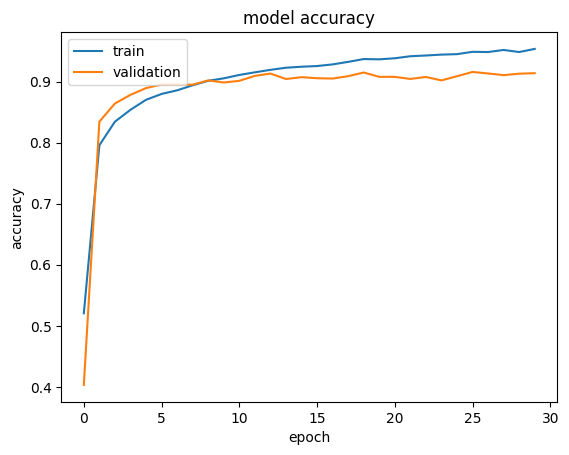

In [35]:
#Plotting training and validation accuracies
plt.plot(history_cnn_2.history['accuracy'])
plt.plot(history_cnn_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**
* The validation accuracy skyrockets to 90% within the first 5 epochs until it suddenly stops improving almost immediately and stays around that 90 for the rest of the time.
* Training accuracy has a bit of a slower start but rises above validation accuracy around 8 epochs in.
* There is a clear overfitting of the data in this scenario, however it will lead to greater results.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

563/563 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1814
           1       0.86      0.94      0.90      1828
           2       0.93      0.92      0.93      1803
           3       0.87      0.90      0.88      1719
           4       0.94      0.92      0.93      1812
           5       0.88      0.93      0.91      1768
           6       0.91      0.90      0.91      1832
           7       0.97      0.89      0.93      1808
           8       0.90      0.90      0.90      1812
           9       0.94      0.89      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



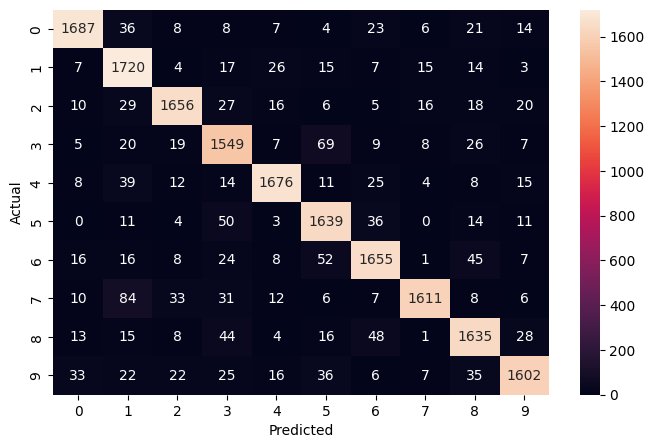

In [39]:
pred = new_model_cnn_2.predict(X_test) # Corrected to use new_model and X_test_flat
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1) # Corrected to use y_test

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = [0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**
The second CNN model shows significantly improved performance compared to the previous iterations.
* The model achieved an overall accuracy of **91%**, a substantial improvement from the previous **68%** accuracy of the previous ANN model.
* The predictions were almost all at or barely below 90% with the worst performing ones being 1,3,5. However all were still incredibly high.
* Some common misclassifications are: '1' being confused with a '7' and a '4', '3' being misclassified with '5', and '5' being misclassified with a '3' and a '6'.